In [1]:
import numpy as np
import pandas as pd
import wrangle
import prepare
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [2]:
#get data
df = wrangle.get_telco_tenure()

In [3]:
#clean data
df = wrangle.clean_telco_tenure(df)

In [4]:
#split data
train, validate ,test = wrangle.telco_split(df)

train(949, 4),validate(407, 4),test(339, 4)


In [5]:
#create X_train, X_validate, X_test
X_train = train.drop(columns='customer_id')
X_validate = validate.drop(columns='customer_id')
X_test = test.drop(columns='customer_id')

In [6]:
#set up scalers
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

min_max_scaler.fit(X_train)
robust_scaler.fit(X_train)
standard_scaler.fit(X_train)

StandardScaler()

In [7]:
#scale data both ways
mmX_train_scaled = min_max_scaler.transform(X_train)
rX_train_scaled = robust_scaler.transform(X_train)
sX_train_scaled = standard_scaler.transform(X_train)

mmX_validate_scaled = min_max_scaler.transform(X_validate)
rX_validate_scaled = robust_scaler.transform(X_validate)
sX_validate_scaled = standard_scaler.transform(X_validate)

mmX_test_scaled = min_max_scaler.transform(X_test)
rX_test_scaled = robust_scaler.transform(X_test)
sX_test_scaled = standard_scaler.transform(X_test)


In [8]:
#create new df for scaler dataframes
mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
mmX_validate_scaled = pd.DataFrame(mmX_validate_scaled, columns=X_validate.columns)
mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
rX_validate_scaled = pd.DataFrame(rX_validate_scaled, columns=X_validate.columns)
rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
sX_validate_scaled = pd.DataFrame(sX_validate_scaled, columns=X_validate.columns)
sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)

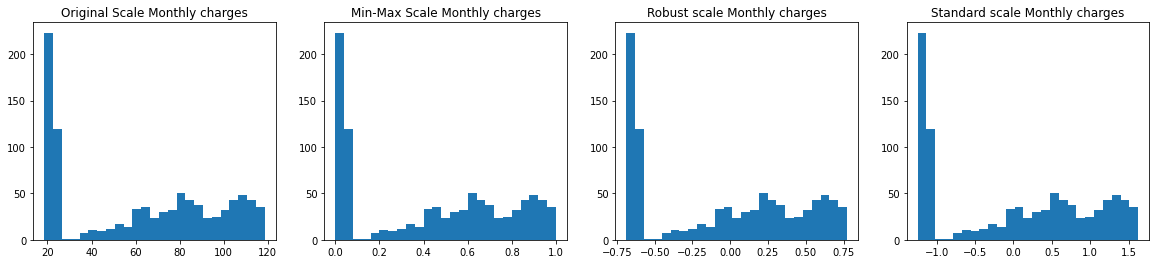

In [9]:
#scale monthly charges
plt.figure(figsize=(20,4))
plt.subplot(141)
plt.hist(train.monthly_charges,bins=25)
plt.title("Original Scale Monthly charges")
plt.subplot(142)
plt.hist(mmX_train_scaled.monthly_charges, bins = 25)
plt.title("Min-Max Scale Monthly charges")
plt.subplot(143)
plt.hist(rX_train_scaled.monthly_charges, bins = 25)
plt.title("Robust scale Monthly charges")
plt.subplot(144)
plt.hist(sX_train_scaled.monthly_charges, bins = 25)
plt.title("Standard scale Monthly charges")
plt.show()


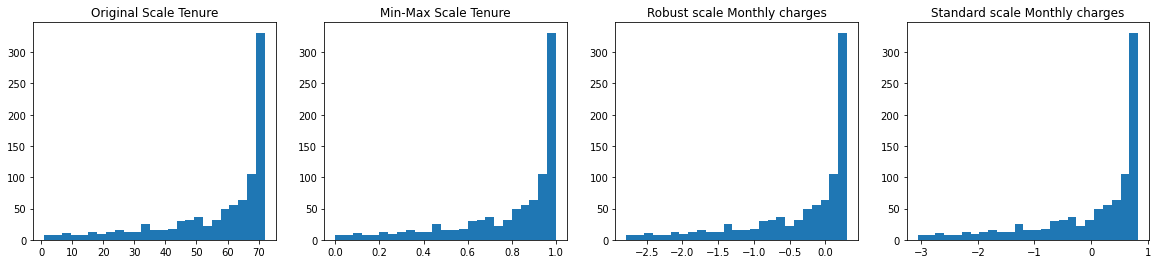

In [10]:
#scale tenure
plt.figure(figsize=(20,4))
plt.subplot(141)
plt.hist(train.tenure,bins=25)
plt.title("Original Scale Tenure")
plt.subplot(142)
plt.hist(mmX_train_scaled.tenure, bins = 25)
plt.title("Min-Max Scale Tenure")
plt.subplot(143)
plt.hist(rX_train_scaled.tenure, bins = 25)
plt.title("Robust scale Monthly charges")
plt.subplot(144)
plt.hist(sX_train_scaled.tenure, bins = 25)
plt.title("Standard scale Monthly charges")
plt.show()



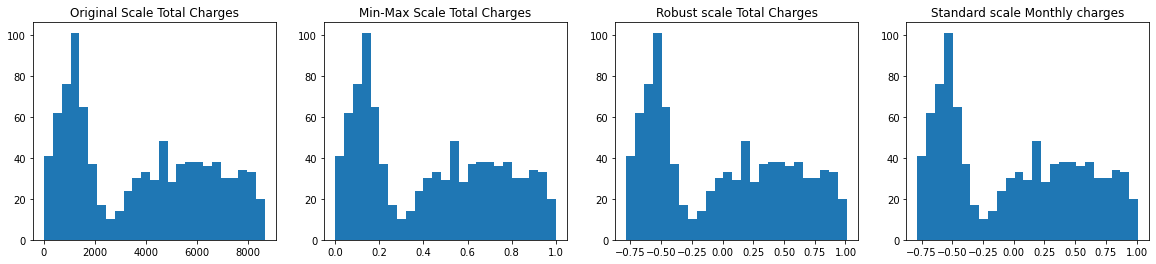

In [11]:
#scale total charges
plt.figure(figsize=(20,4))
plt.subplot(141)
plt.hist(train.total_charges,bins=25)
plt.title("Original Scale Total Charges")
plt.subplot(142)
plt.hist(mmX_train_scaled.total_charges, bins = 25)
plt.title("Min-Max Scale Total Charges")
plt.subplot(143)
plt.hist(rX_train_scaled.total_charges, bins = 25)
plt.title("Robust scale Total Charges")
plt.subplot(144)
plt.hist(rX_train_scaled.total_charges, bins = 25)
plt.title("Standard scale Monthly charges")
plt.show()

In [12]:
# apply inverse_transorm, is it the same as original, answer: yes
mmX_train_scaled = min_max_scaler.inverse_transform(mmX_train_scaled)
rX_train_scaled = robust_scaler.inverse_transform(rX_train_scaled)
sX_train_scaled = robust_scaler.inverse_transform(sX_train_scaled)

mmX_validate_scaled = min_max_scaler.inverse_transform(mmX_validate_scaled)
rX_validate_scaled = robust_scaler.inverse_transform(rX_validate_scaled)
sX_validate_scaled = robust_scaler.inverse_transform(sX_validate_scaled)

mmX_test_scaled = min_max_scaler.inverse_transform(mmX_test_scaled)
rX_test_scaled = robust_scaler.inverse_transform(rX_test_scaled)
sX_test_scaled = robust_scaler.inverse_transform(sX_test_scaled)

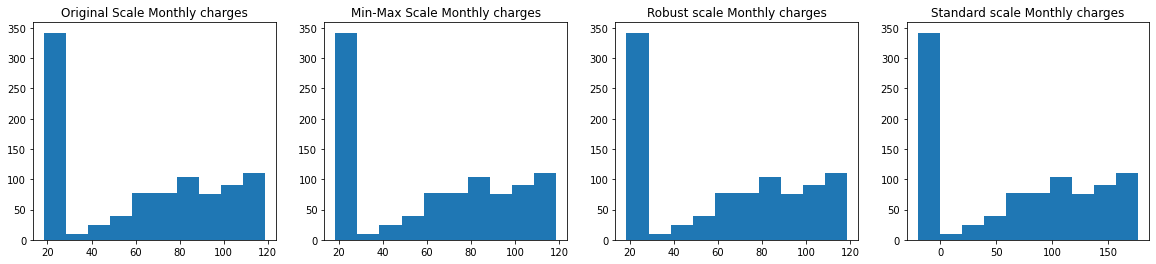

In [13]:
mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
mmX_validate_scaled = pd.DataFrame(mmX_validate_scaled, columns=X_validate.columns)
mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)


rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
rX_validate_scaled = pd.DataFrame(rX_validate_scaled, columns=X_validate.columns)
rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
sX_validate_scaled = pd.DataFrame(sX_validate_scaled, columns=X_validate.columns)
sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)

plt.figure(figsize=(20,4))
plt.subplot(141)
plt.hist(train.monthly_charges)
plt.title("Original Scale Monthly charges")
plt.subplot(142)
plt.hist(mmX_train_scaled.monthly_charges)
plt.title("Min-Max Scale Monthly charges")
plt.subplot(143)
plt.hist(rX_train_scaled.monthly_charges)
plt.title("Robust scale Monthly charges")
plt.subplot(144)
plt.hist(sX_train_scaled.monthly_charges)
plt.title("Standard scale Monthly charges")
plt.show()

In [14]:
#3 using quantile transformer
from sklearn.preprocessing import QuantileTransformer

In [15]:
quantile = QuantileTransformer(output_distribution='normal', n_quantiles=949)

In [16]:
quantile.fit(X_train)

QuantileTransformer(n_quantiles=949, output_distribution='normal')

In [17]:
qX_train_scaled = quantile.transform(X_train)

In [18]:
qX_train_scaled = pd.DataFrame(qX_train_scaled, columns=X_train.columns)

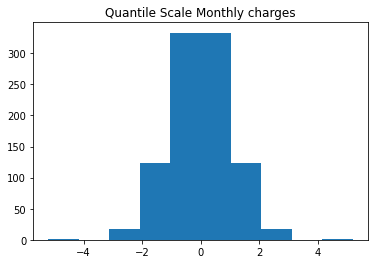

In [19]:
plt.hist(qX_train_scaled.total_charges)
plt.title("Quantile Scale Monthly charges")
plt.show()

In [20]:
#omit output_distibuter, default seems to be uniform distribution
quantile = QuantileTransformer(n_quantiles=949)

In [21]:
quantile.fit(X_train)
qX_train_scaled = quantile.transform(X_train)
qX_train_scaled = pd.DataFrame(qX_train_scaled, columns=X_train.columns)

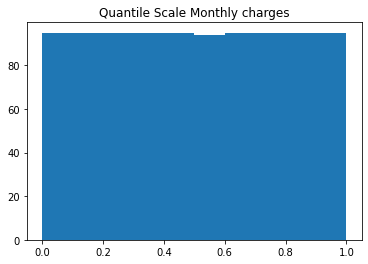

In [22]:
plt.hist(qX_train_scaled.total_charges)
plt.title("Quantile Scale Monthly charges")
plt.show()

In [23]:
#5 write a funtion in prepare.py to do this with one call

In [24]:
train_scaled , validate_scaled , test_scaled = prepare.scale_telco_data(train, validate, test)

In [25]:
train_scaled.describe()

,monthly_charges,tenure,total_charges
count,949.000000,949.000000,949.000000
mean,62.038462,56.832455,3793.878609
std,34.824797,18.225277,2611.915187
min,18.550000,1.000000,19.850000
25%,24.100000,48.000000,1275.600000
50%,65.600000,65.000000,3794.500000
75%,92.650000,71.000000,6093.300000
max,118.600000,72.000000,8670.100000


In [26]:
train_scaled , validate_scaled , test_scaled = prepare.scale_telco_data(train, validate, test, scale_type='MinMax')

In [27]:
train_scaled

,monthly_charges,tenure,total_charges
0,0.624188,0.845070,0.572966
1,0.924538,0.929577,0.844045
2,0.738131,1.000000,0.782203
3,0.074463,0.971831,0.229716
4,0.008496,0.957746,0.153331
...,...,...,...
944,0.549225,0.985915,0.617080
945,0.766617,0.788732,0.629438
946,0.917041,0.887324,0.806618
947,0.058971,0.985915,0.197775
